<a href="https://colab.research.google.com/github/hoangvu7986/dog-cat-classification/blob/main/miai_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# List folder for demo
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
# List GPUs
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

[]


In [ ]:
# Download file from GDrive. Shoudld use zip file and unzip later

!pip install gdown
!gdown --id 1NQ8BDtsg0GbHJw9bX5ceq_u3_56ne8n2

In [12]:
# Download from Remote URL
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-10-26 08:23:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 173.194.206.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   193MB/s    in 0.3s    

2025-10-26 08:23:32 (193 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
import os

# Đường dẫn mặc định Kaggle sẽ gắn (attach) Dataset của bạn
# Tên thư mục thường là tên Dataset, có thể chứa dấu gạch ngang (-)
KAGGLE_DATASET_NAME = 'cats-and-dogs-filtered'

# Xác định thư mục gốc của Dataset trên Kaggle
# Dataset sẽ nằm trong thư mục '/kaggle/input/'
base_dir = os.path.join('/kaggle/input', KAGGLE_DATASET_NAME)

# In ra đường dẫn gốc để kiểm tra
print(f"Dataset base directory: {base_dir}")

# --- Các bước tiếp theo để giải nén hoặc truy cập file ---
# Nếu Dataset này đã được giải nén sẵn, bạn chỉ cần truy cập thẳng vào
# các thư mục con (train, validation, v.v.) bên trong 'base_dir'.

# Ví dụ, nếu cấu trúc Dataset của bạn là:
# /kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/train/
# Bạn sẽ cần:

# Tên thư mục con bên trong Dataset (kiểm tra trên Kaggle)
inner_folder = 'cats_and_dogs_filtered' 
dataset_path = os.path.join(base_dir, inner_folder)

# Các đường dẫn cần thiết cho việc huấn luyện mô hình
train_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'validation')

# In ra các đường dẫn mới
print(f"Train directory: {train_dir}")
print(f"Validation directory: {validation_dir}")

# Bây giờ, bạn có thể sử dụng các biến train_dir và validation_dir này
# để đọc dữ liệu (ví dụ: dùng ImageDataGenerator của Keras).

Dataset base directory: /kaggle/input/cats-and-dogs-filtered
Train directory: /kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/train
Validation directory: /kaggle/input/cats-and-dogs-filtered/cats_and_dogs_filtered/validation


In [13]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [14]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
base_dir = '/kaggle/input/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [15]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.918.jpg', 'cat.535.jpg', 'cat.108.jpg', 'cat.971.jpg', 'cat.553.jpg', 'cat.291.jpg', 'cat.966.jpg', 'cat.269.jpg', 'cat.556.jpg', 'cat.793.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
import os

# --- GIẢ ĐỊNH TỪ CÁC BƯỚC TRƯỚC ---
# Các biến đường dẫn cần thiết để code bên dưới hoạt động:
# base_dir = '/kaggle/input/cats-and-dogs-filtered' 
# inner_folder = 'cats_and_dogs_filtered' 
# dataset_path = os.path.join(base_dir, inner_folder)
# train_dir = os.path.join(dataset_path, 'train')

# *******************************************************************
# Bổ sung các biến đường dẫn cụ thể cho thư mục mèo và chó (dogs/cats)
# *******************************************************************

# Tên thư mục con chứa ảnh mèo (cats) và chó (dogs)
# Các thư mục này nằm bên trong thư mục 'train'
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# In ra đường dẫn để đảm bảo chúng đã đúng
print(f"Directory for training cats: {train_cats_dir}")
print(f"Directory for training dogs: {train_dogs_dir}")

# *******************************************************************
# Đoạn code bạn yêu cầu sửa (SỬ DỤNG CÁC BIẾN MỚI)
# *******************************************************************

# Lấy danh sách tên tệp (filenames) của ảnh mèo
train_cat_fnames = os.listdir(train_cats_dir)
print("\nTen anh meo dau tien:")
print(train_cat_fnames[:10])

# Lấy danh sách tên tệp của ảnh chó
train_dog_fnames = os.listdir(train_dogs_dir)

# Sắp xếp tên tệp ảnh chó theo thứ tự (tùy chọn)
train_dog_fnames.sort() 

print("\nTen anh cho dau tien:")
print(train_dog_fnames[:10])

# In ra tổng số lượng ảnh để xác nhận
print(f"\nTong so anh meo trong tap train: {len(train_cat_fnames)}")
print(f"Tong so anh cho trong tap train: {len(train_dog_fnames)}")

In [16]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

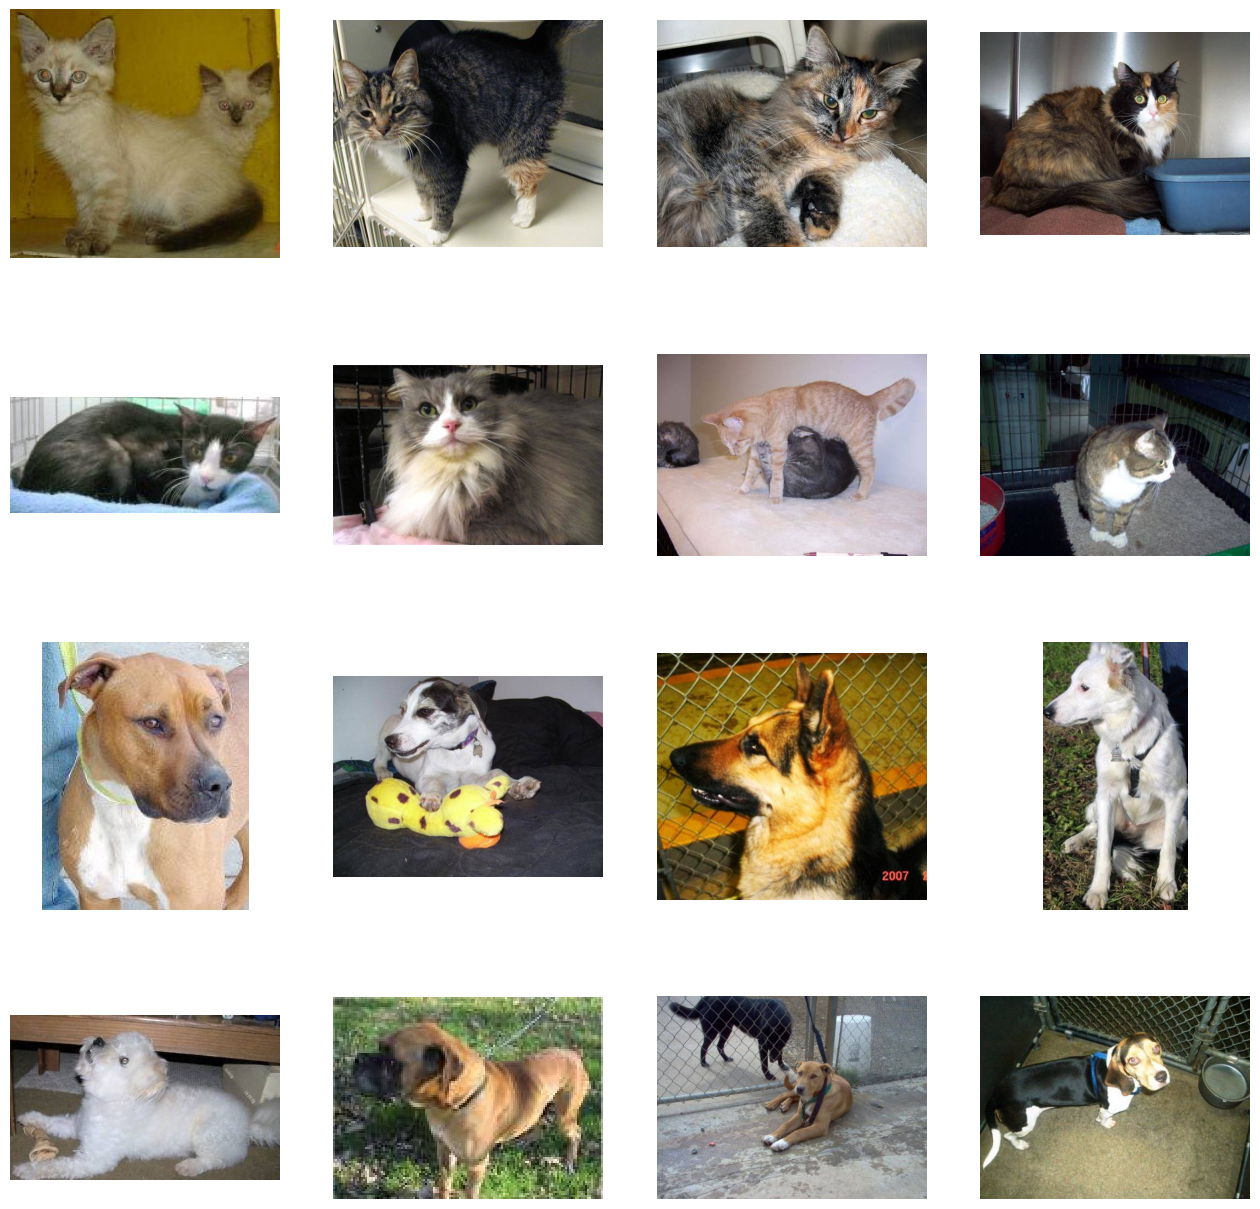

In [33]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [24]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [25]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [2]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

NameError: name 'layers' is not defined

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [1]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

NameError: name 'model' is not defined

In [ ]:
model.save("catdogmodel.h5")

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
!rm -rf /kaggle/working/*